#  $\hspace{6cm}$ Time series analysis and visualization


## Part 1

### 1.1

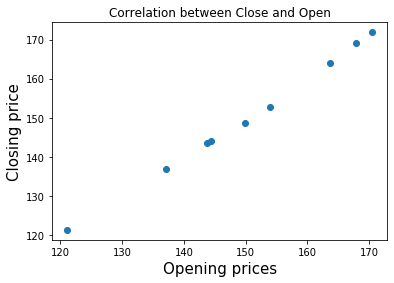

,High,Low,Open,Close,Volume,Adj Close,Month_End
Date,,,,,,,
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,111.286987,False
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,111.162437,False
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715,False
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305,False
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080,False
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047,False
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275,False
2017-01-12,119.300003,118.209999,118.900002,119.250000,27086200.0,114.257195,False
2017-01-13,119.620003,118.809998,119.110001,119.040001,26111900.0,114.055984,False


In [15]:
import pandas as pd
import matplotlib.dates as mdates
import pandas_datareader.data as web
from pandas.tseries.offsets import *
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def show_correlation(stockName,period):
        '''
        Function which shows the correlation between Open and Close 
        prices over the last business day of each month in a given period
        '''
        
        start_end=period.split(' to ')
            
        df = web.DataReader(stockName,'yahoo', start_end[0], start_end[1])
        df['Month_End'] = df.index.is_month_end # creat a boolean column to detect the last business date of each month
        openn=df[df['Month_End']==True]['Open']
        close=df[df['Month_End']==True]['Close']
        plt.scatter(openn, close)
        plt.xlabel('Opening prices',fontsize=15)
        plt.ylabel('Closing price',fontsize=15)
        plt.title('Correlation between Close and Open')


        plt.show()
        return df

show_correlation('AAPL','2017-01-03 to 2018-01-01')




### 1.2


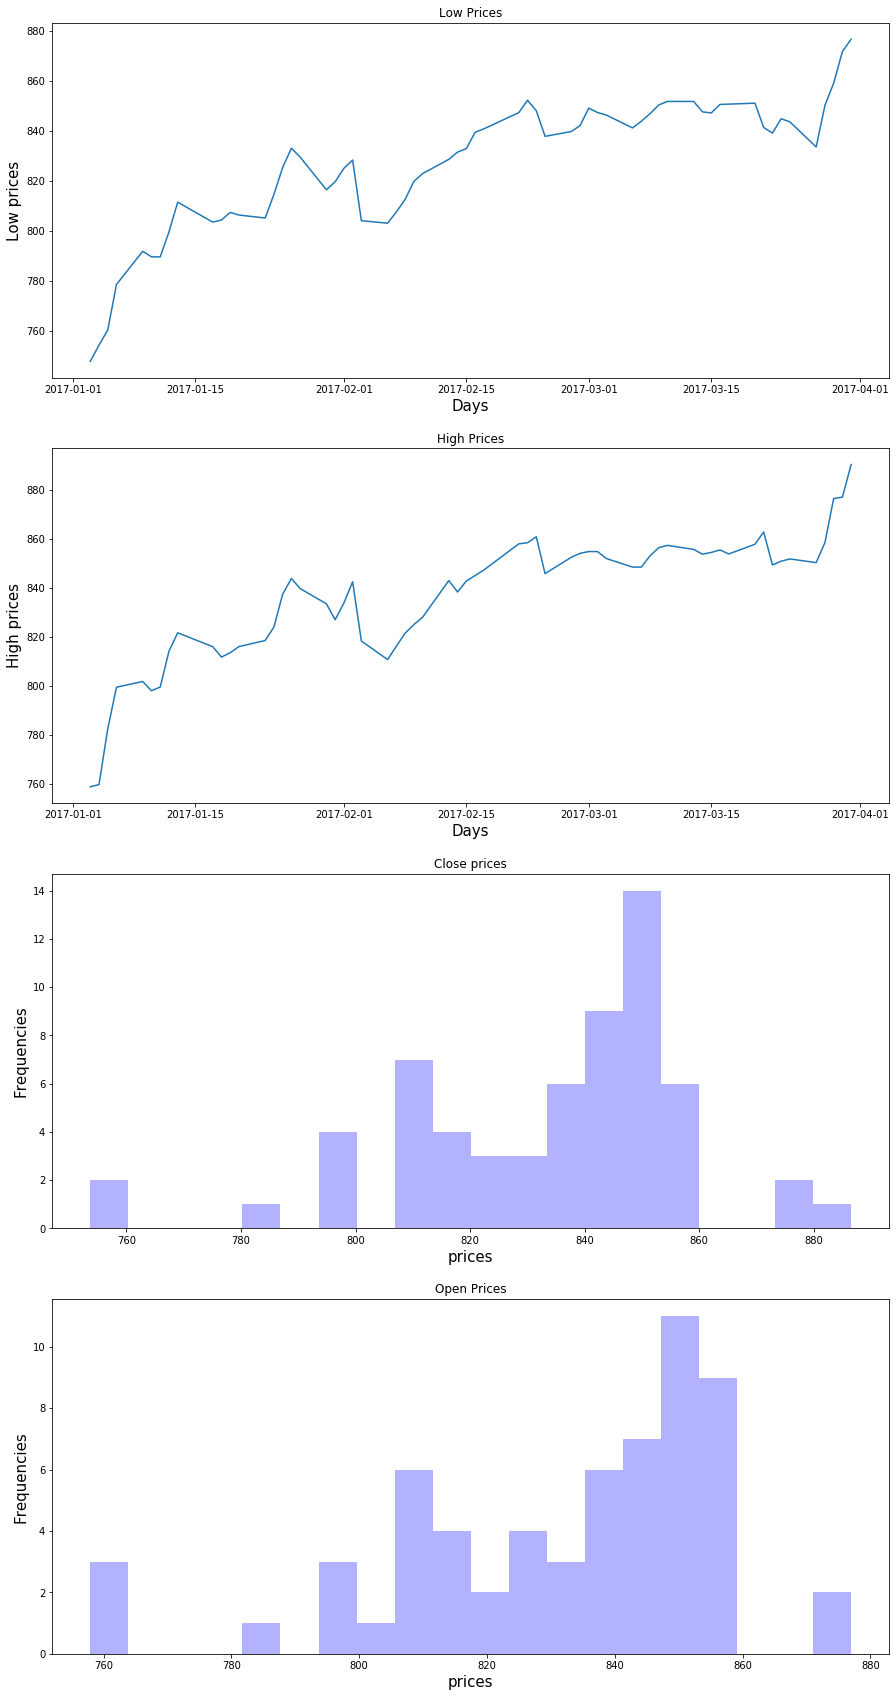

In [27]:
def show_daily_features(stockName,period):
        '''
        The function (show_daily_features) should receive the stock name and a
        period as the input arguments, and outputs four (daily) subplots with the
        same size for each feature: line plots for ‘Low’ and ‘High’ prices, histogram
        plots for ‘Close’ and ‘Open’ values.
        
        '''
        start_end=period.split(' to ')            
        df = web.DataReader(stockName,'yahoo', start_end[0], start_end[1])
        fig, axs = plt.subplots(4) # creat four subplots  
        plt.subplots_adjust( hspace=0.2)
        n_bins = 20        
        fig.set_figheight(30)
        fig.set_figwidth(15)
        axs[0].plot(df.index,df['Low'])
        axs[1].plot(df.index,df['High'])
        axs[2].hist(df['Close'], bins=n_bins,color='b', alpha=0.3)
        axs[3].hist(df['Open'] , bins=n_bins,color='b', alpha=0.3)
        axs[0].set_xlabel('Days',fontsize=15)
        axs[0].set_ylabel('Low prices',fontsize=15)
        axs[0].set_title('Low Prices')
        axs[1].set_xlabel('Days',fontsize=15)
        axs[1].set_ylabel('High prices',fontsize=15)
        axs[1].set_title('High Prices')
        axs[2].set_xlabel('prices',fontsize=15)
        axs[2].set_ylabel('Frequencies',fontsize=15)
        axs[2].set_title('Close prices')
        axs[3].set_xlabel('prices',fontsize=15)
        axs[3].set_ylabel('Frequencies',fontsize=15)
        axs[3].set_title('Open Prices')
show_daily_features('AMZN','2017-01-01 to 2017-04-01')




### 1.3

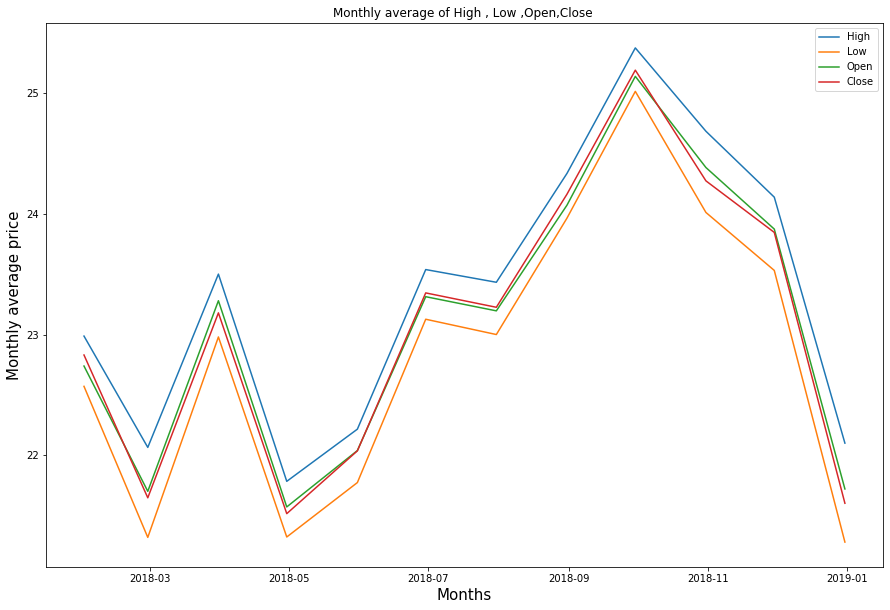

In [29]:
def show_monthly_average(stockName,period):
    
    '''
    The function (show_monthly_average) should receive the stock name and
    a period as the input arguments, calculates the monthly average price for
    each feature (‘Open’, ’High’, ’Low’ and 'Close’), then outputs four line
    plots in one graph representing changes in average prices over the given
    period. (Label in X axis: Month (not Day), Label in y axis: Montly average
    price).

    ''' 
    start_end=period.split(' to ') 
    df = web.DataReader(stockName,'yahoo', start_end[0], start_end[1])
    ave=df.groupby(pd.Grouper(freq='M')).mean()    
    plt.figure(figsize=(15,10))      
    plt.plot(ave.index, ave['High'],label="High")
    plt.plot(ave.index, ave['Low'],label='Low')
    plt.plot(ave.index, ave['Open'],label='Open')
    plt.plot(ave.index, ave['Close'],label='Close')
    plt.xlabel('Months',fontsize=15)
    plt.ylabel('Monthly average price',fontsize=15)
    plt.title('Monthly average of High , Low ,Open,Close ' )
    plt.legend()
    
show_monthly_average('HPQ','2018-01-01 to 2019-01-01')


### 1.4

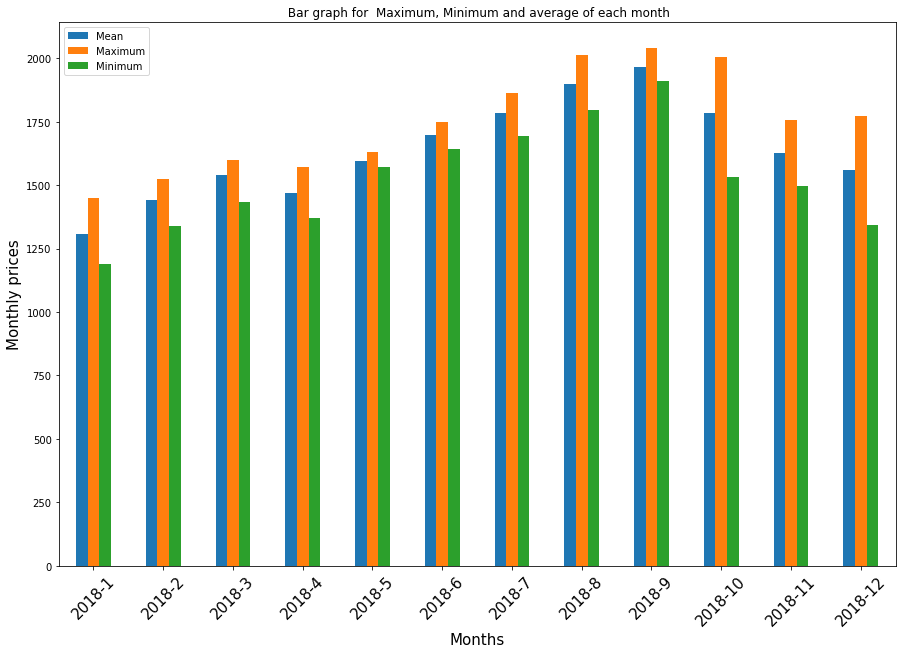

In [31]:
def show_stock_statistics(stockName,period):
    
    '''  
    1.4. The function (show_stock_statistics) should receive the stock name and a
    period as the input arguments, calculates the maximum, minimum and
    average values of ‘Close’ price per month, and outputs these monthly
    statistics in terms of bar plots in one graph over the given period. (Label
    in X axis: Month, Label in y axis: Close price)    
    
    '''
    
    
    start_end=period.split(' to ') 
    df = web.DataReader(stockName,'yahoo', start_end[0], start_end[1])    
    ave=df.groupby(pd.Grouper(freq='M')).mean()['Close']
    mini=df.groupby(pd.Grouper(freq='M')).min()['Close']
    maxi=df.groupby(pd.Grouper(freq='M')).max()['Close']
    frame = { 'Mean': ave, 'Maximum': maxi,'Minimum':mini }    
    df1=pd.DataFrame(frame) # creat a dataframe of the minimum maximum and average serieses
    df1.index=[str(item.year)+'-'+str(item.month) for item in df1.index]# make index in date format removing units less than hour
   
    fig=plt.figure(figsize=(15,10))     
    ax = fig.add_subplot(1, 1, 1)
    chart=df1.plot.bar(ax=ax)
    ax.legend(loc='upper left')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='center',fontsize=15)
    plt.xlabel('Months',fontsize=15)
    plt.ylabel('Monthly prices',fontsize=15)
    plt.title(' Bar graph for  Maximum, Minimum and average of each month')
   
    
show_stock_statistics('AMZN','2018-01-01 to 2019-01-01')


  

### Part 2

### 2.1


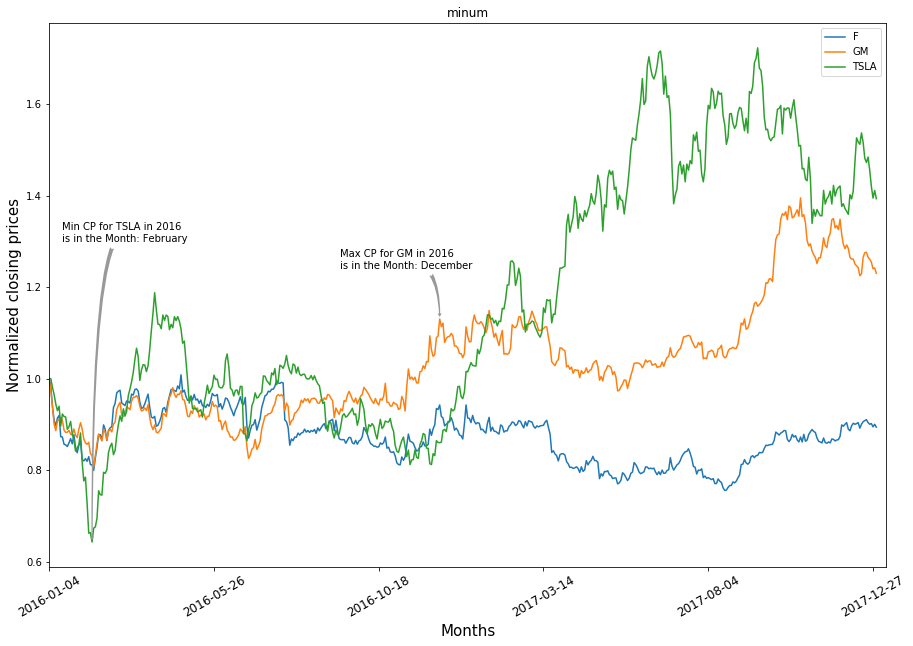

In [32]:
from matplotlib.patches import Ellipse
import datetime
def show_multiple_stocks(stockName,period):
    '''
    The function (show_multiple_stocks), should receive the list of stock names
    and the period. Then for each stock variable, it should choose and store the daily
   ‘Close’ price information (in a data frame). Then it should plot the variations of
   ‘Close’ prices of all given stock names over the given period (by line plots).
    
    '''
    
    
    start_end=period.split(' to ')   
    el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)
    fig, ax = plt.subplots(figsize=(15, 10)) 
    
    for st in stockName:
        df = web.DataReader(st,'yahoo', start_end[0], start_end[1])      
        close=df['Close']
        base=close.loc['2016-01-04']
        norClose=close/base #Normalize each value of the 'Close' series
        maxi=df.groupby(pd.Grouper(freq='Y')).max()['Close']
        mini=df.groupby(pd.Grouper(freq='Y')).min()['Close']
        norMax=maxi.iloc[0]/base
        norMin=mini.iloc[0]/base
        fM=norClose.reset_index()
        idxMax=fM[fM['Close']==norMax]
        idxMin=fM[fM['Close']==norMin]
        ax.plot(norClose.reset_index()['Date'].index, norClose.reset_index()['Close'],label=st )
        dt=fM.Date
        #x.set_xticks(self, ticks, minor=False)
        ax.set_xticklabels([dt.iloc[i].date() for i in range(0,len(dt)-1,int(len(dt)/5)) ], rotation=30, fontsize='large')
        ax.set_xlim(0 , dt.shape[0] +5)
        
       
        if st=='GM':
            ax.annotate('Max CP for GM in 2016\nis in the Month: '+datetime.date(1900, idxMax.Date.iloc[0].month, 1).strftime('%B'),
            xy=(idxMax.index[0], norMax), xycoords='data',
            xytext=(-100, 50), textcoords='offset points',
            size=10,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el, 
                             connectionstyle="angle3,angleA=0,angleB=-90"))
        elif st=='TSLA':
            ax.annotate('Min CP for TSLA in 2016\nis in the Month: '+datetime.date(1900, idxMin.Date.iloc[0].month, 1).strftime('%B'),
            xy=(idxMin.index[0], norMin), xycoords='data',
            xytext=(-30, 300), textcoords='offset points',
            size=10,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el, 
                             connectionstyle="angle3,angleA=0,angleB=-90"))
            
    ax.legend()
    ax.set_xlabel('Months',fontsize=15)
    ax.set_ylabel('Normalized closing prices',fontsize=15)   
    
    

stockList=['F','GM','TSLA']
show_multiple_stocks(stockList,'2016.01.04 to 2017.12.30 ')




### 2.2

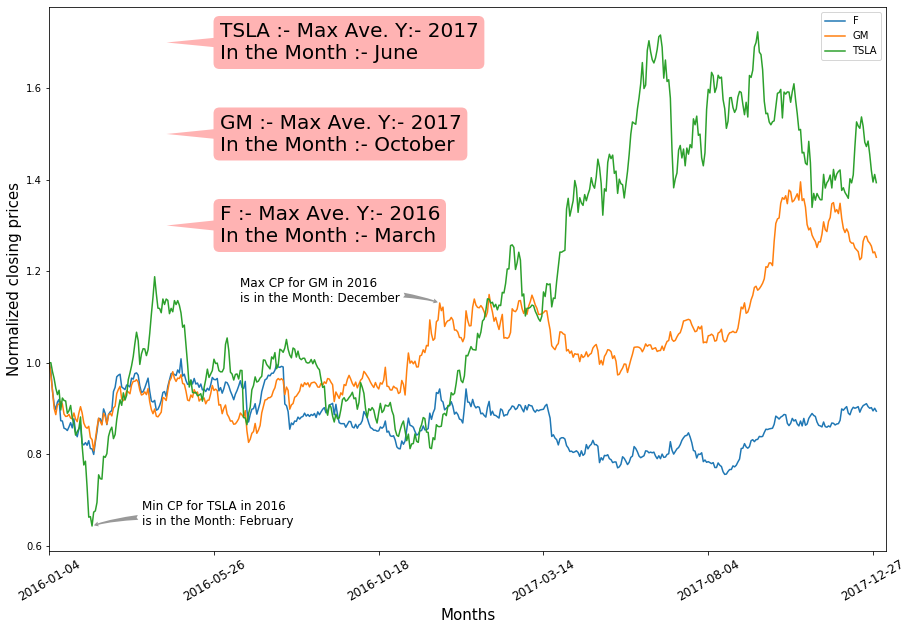

In [6]:
'''
In this exercise I have added 'M' to the previous function name only to avoid conflits how ever both functions literally the same
except that this function only out puts the maximum averages of the data.

'''


from matplotlib.patches import Ellipse
import datetime
def show_multiple_stocksM(stockName,period):
    start_end=period.split(' to ')   
    el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)
    fig, ax = plt.subplots(figsize=(15, 10)) 
    j=0
    for st in stockName:
        df = web.DataReader(st,'yahoo', start_end[0], start_end[1])     
       
        close=df['Close']
        base=close.loc['2016-01-04']
        norClose=close/base
        
        maxi=df.groupby(pd.Grouper(freq='Y')).max()['Close']
        mini=df.groupby(pd.Grouper(freq='Y')).min()['Close']
        ave=(df.groupby(pd.Grouper(freq='M')).mean()['Close'])/base # Normalized monthly average closing prices
        yearM=ave.groupby(pd.Grouper(freq='Y')).max() # Normalized yearly Maximum Average closing prices
        
        re=ave.reset_index()
        aveMax=yearM.max() # Maximum average with in the period
        maxD=re[re['Close']==aveMax]
        norMax=maxi.iloc[0]/base
        norMin=mini.iloc[0]/base
        
        fM=norClose.reset_index()# re-indexed  normalized closing prices
        aveRe=ave.reset_index() # re-indexed normalized monthly average closing prices
        idxMax=fM[fM['Close']==norMax]
        idxMin=fM[fM['Close']==norMin]
        
       
        
        ax.plot(norClose.reset_index()['Date'].index, norClose.reset_index()['Close'],label=st )
        dt=fM.Date        
        ax.set_xticklabels([dt.iloc[i].date() for i in range(0,len(dt)-1,int(len(dt)/5)) ], rotation=30, fontsize='large')
        ax.set_xlim(0 , dt.shape[0] +5)
        ax.annotate(st+' :- Max Ave. Y:- '+ str(maxD.Date.iloc[0].year)+ '\nIn the Month :- '+datetime.date(1900, maxD.Date.iloc[0].month, 1).strftime('%B'),
                  xy=(70 , 1.3+j), xycoords='data',
                  xytext=(55, 0), textcoords='offset points',
                  size=20, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.5)))
        
        j+=0.2 # reposition buble vertically
        if st=='GM':
            ax.annotate('Max CP for GM in 2016\nis in the Month: '
                        +datetime.date(1900, idxMax.Date.iloc[0].month, 1).strftime('%B'),
            xy=(idxMax.index[0], norMax), xycoords='data',
            xytext=(-200, norMax), textcoords='offset points',
            size=12,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el, 
                             connectionstyle="angle3,angleA=0,angleB=-20"))
        elif st=='TSLA':
            ax.annotate('Min CP for TSLA in 2016\nis in the Month: '+datetime.date(1900, idxMin.Date.iloc[0].month, 1).strftime('%B'),
            xy=(idxMin.index[0], norMin), xycoords='data',
            xytext=(50, norMin), textcoords='offset points',
            size=12,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el, 
                             connectionstyle="angle3,angleA=0,angleB=20"))
            
    ax.legend()
    ax.set_xlabel('Months',fontsize=15)
    ax.set_ylabel('Normalized closing prices',fontsize=15)   
    
    

stockList=['F','GM','TSLA']
show_multiple_stocksM(stockList,'2016.01.04 to 2017.12.30 ')



### Reference

https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/annotation_demo.html